### Importing all the libraries. 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading the dataset 

In [4]:
df = pd.read_csv('suv_data.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


1. This dataset is quite small and easy to understand. 
2. From the column name itself we can say what does those columns means. 
3. Decision 1 : Drop User ID column, as it does not contribute anyhow to purchased column (target variable)

In [6]:
df = df.drop('User ID', axis=1)

### Data Understanding : Basic overview of data 

In [8]:
print(f"No.of Rows : {df.shape[0]}, No.of Columns : {df.shape[1]}")
print(f"Basic information of the dataset.\n {df.info()}")
print(f"Descriptive statistics of the numerical column :\n {df.describe()}")
print(f"No.of Null values : {df.isnull().sum()}")
print(f"No.of Duplicates : {df.duplicated().sum()}")

No.of Rows : 400, No.of Columns : 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
Basic information of the dataset.
 None
Descriptive statistics of the numerical column :
               Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000
No.of Null values : Gender

1. As we can see that we have 20 duplicates in our dataset. 
2. Decision 2 : Drop those duplicates. 

### Dropping the duplicates 

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(380, 4)

1. We have one categorical variable. Gender. Let us encode this column. 
2. Decision 3 : Encoding Gender column. 

### Encoding Gender Column 

In [15]:
df['Gender'].value_counts()

Gender
Female    198
Male      182
Name: count, dtype: int64

In [16]:
df['Gender'] = df['Gender'].replace({'Female':1, 'Male':0})

In [17]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


### Univariate analysis : 

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


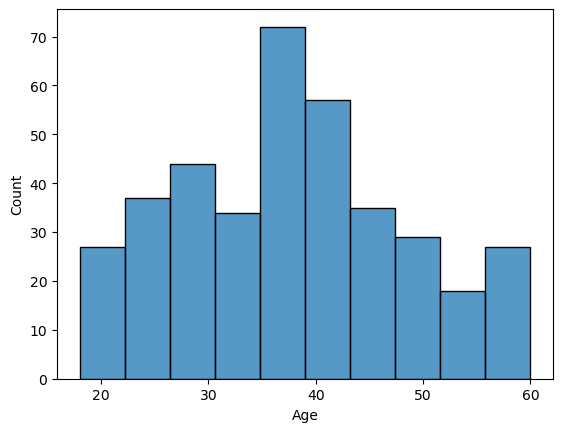

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


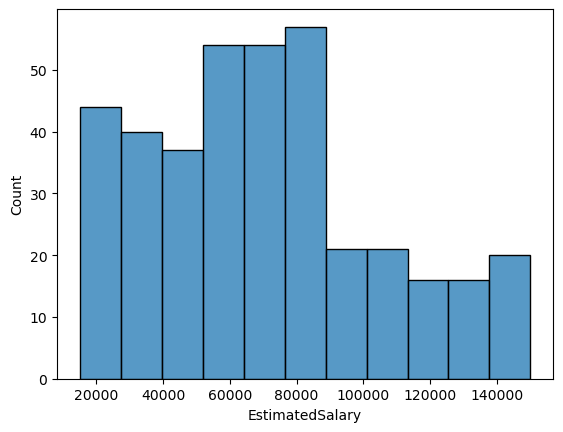

In [19]:
columns = ['Age', 'EstimatedSalary']
for col in columns: 
    sns.histplot(df[col])
    plt.show()

In [20]:
# Checking skewness of the columns : 
for col in columns:
    print(f"{col} skewness = {df[col].skew()}")

Age skewness = 0.23984276333506405
EstimatedSalary skewness = 0.4612750800555465


### Univariate analysis for categorical columns 

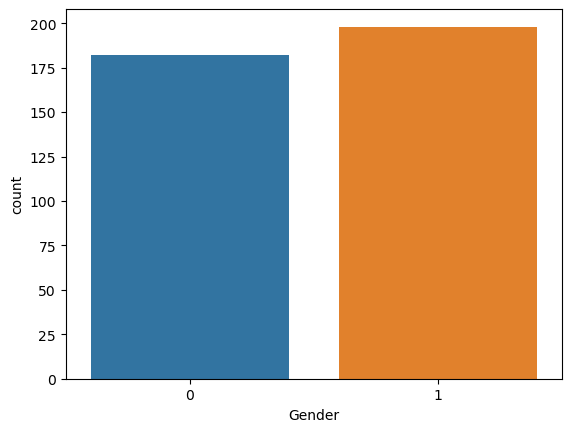

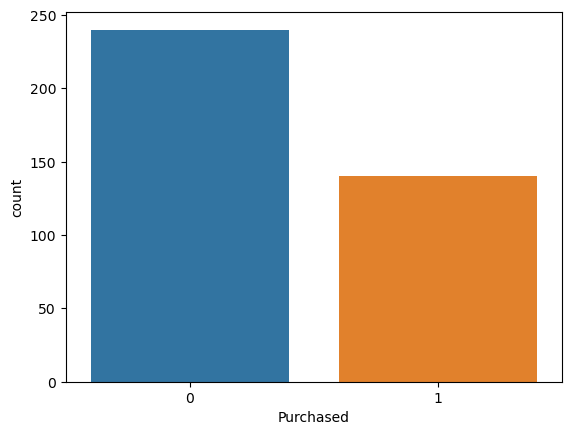

In [22]:
columns = ['Gender','Purchased' ]
for col in columns: 
    sns.countplot(data=df, x=col)
    plt.show()


##### We can see that we have quite an imbalanced data. 
##### Decision 4 : Use weight_class = 'balanced' for now, and then can opt for SMOTE 

In [24]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


Okay, our data is all set for model training. We have only 4 features in this dataset.I am not doing feature selection. As i feel all are contributing. 

In [26]:
corr = df.corrwith(df['Purchased'])
corr

Gender             0.044257
Age                0.626505
EstimatedSalary    0.374928
Purchased          1.000000
dtype: float64

We can see that Age is the column which is most contributing and then Estimated Salary and then Gender is contributing very less. 

Let's see of dropping after the training accuracy and metrics evaluation 

In [29]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [30]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [31]:
X

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 380, dtype: int64

In [33]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[ 0.96762892, -0.90071374,  0.50506469],
       [ 0.96762892, -0.23100066, -0.30146663],
       [-1.03345402,  0.43871242, -0.48069581],
       [-1.03345402,  0.24736583, -0.39108122],
       [ 0.96762892,  1.39544539,  1.311596  ],
       [-1.03345402, -0.23100066,  0.14660632],
       [ 0.96762892,  0.43871242,  0.29596398],
       [ 0.96762892,  2.16083176, -0.71966805],
       [ 0.96762892,  0.9170789 ,  1.28172447],
       [-1.03345402, -1.8574467 , -0.54043887],
       [ 0.96762892, -0.23100066, -0.77941111],
       [-1.03345402, -0.03965406, -0.54043887],
       [-1.03345402,  0.9170789 , -1.34697018],
       [-1.03345402, -1.28340692, -1.52619936],
       [ 0.96762892, -1.8574467 , -0.06249439],
       [ 0.96762892, -0.51802055,  2.38697108],
       [-1.03345402, -1.18773363, -1.43658477],
       [ 0.96762892, -0.03965406,  0.29596398],
       [-1.03345402,  0.15169253,  0.20634938],
       [-1.03345402,  0.15169253,  0.0271202 ],
       [ 0.96762892, -0.03965406,  0.027

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import  GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'SVM' : SVC(),
    'naive bayes' : GaussianNB(), 
    'dt' : DecisionTreeClassifier()
}
for key,model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    print(f"{model} : ")
    print(f"Accuracy score = {accuracy_score(y_test, pred)}")
    

LogisticRegression(class_weight='balanced') : 
Accuracy score = 0.8026315789473685
SVC() : 
Accuracy score = 0.8947368421052632
GaussianNB() : 
Accuracy score = 0.9210526315789473
DecisionTreeClassifier() : 
Accuracy score = 0.7894736842105263


In [37]:
# best model using : 
best_model = GaussianNB()
best_model.fit(X_train_scaled, y_train)
pred = best_model.predict(X_test_scaled)

In [38]:
# Testing the input data : 
input_data = np.array([0,36,33000]).reshape(1,-1)
input_data_scaled = scaler.transform(input_data)
pred = best_model.predict(input_data_scaled)
pred[0]

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [39]:
if pred == 0:
    print("The person will not buy SUV ")
else:
    print("the person will buy SUV ")

The person will not buy SUV 


In [40]:
# saving our model.
import pickle 
with open('scaler.pkl', 'wb') as scaler_file: 
    pickle.dump(scaler, scaler_file)

with open('best_model.pkl', 'wb') as model_file: 
    pickle.dump(best_model, model_file)

In [41]:
# Using the saved model 
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
with open('best_model.pkl', 'rb') as model_file: 
    loaded_model = pickle.load(model_file)

In [42]:
# testing saved model 
input_data = np.array([0,36,33000]).reshape(1,-1)
input_scaled = loaded_scaler.transform(input_data)
model_prediction = loaded_model.predict(input_scaled)
model_prediction[0]

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

### Modelling After Feature Selection 

In [43]:
X = df.drop(columns=['Purchased', 'Gender'], axis=1)
y = df['Purchased']

In [44]:
# train test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Feature scaling 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# best model using : 
best_model = GaussianNB()
best_model.fit(X_train_scaled, y_train)
pred = best_model.predict(X_test_scaled)
print(f"Accuracy score = {accuracy_score(y_test, pred)}")

# Testing the input data : 
input_data = np.array([36,33000]).reshape(1,-1)
input_data_scaled = scaler.transform(input_data)
pred = best_model.predict(input_data_scaled)
pred[0]

Accuracy score = 0.9210526315789473


C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

# I did feature scaling and dropped gender column, and got the same accuracy with the three features combination. 
# I am not using this 2 feature model because i have already implemented the model with 3 features.